In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv


## Import Libraries


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [48]:
df = pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')
df.shape
print(f'The number of rows in the dataset', df.shape[0])
print(f'The number of columns in the dataset', df.shape[1])

The number of rows in the dataset 2772
The number of columns in the dataset 7


In [49]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Description

In [50]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [54]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

## Data Transformation 
- There are some columns which are in object data types. We will convert them to numerical data types so it is easier for machine learning models to comprehend.

In [55]:
df['sex'] = df['sex'].map({'female': 0, 'male':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes':1})
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Data Exploration 

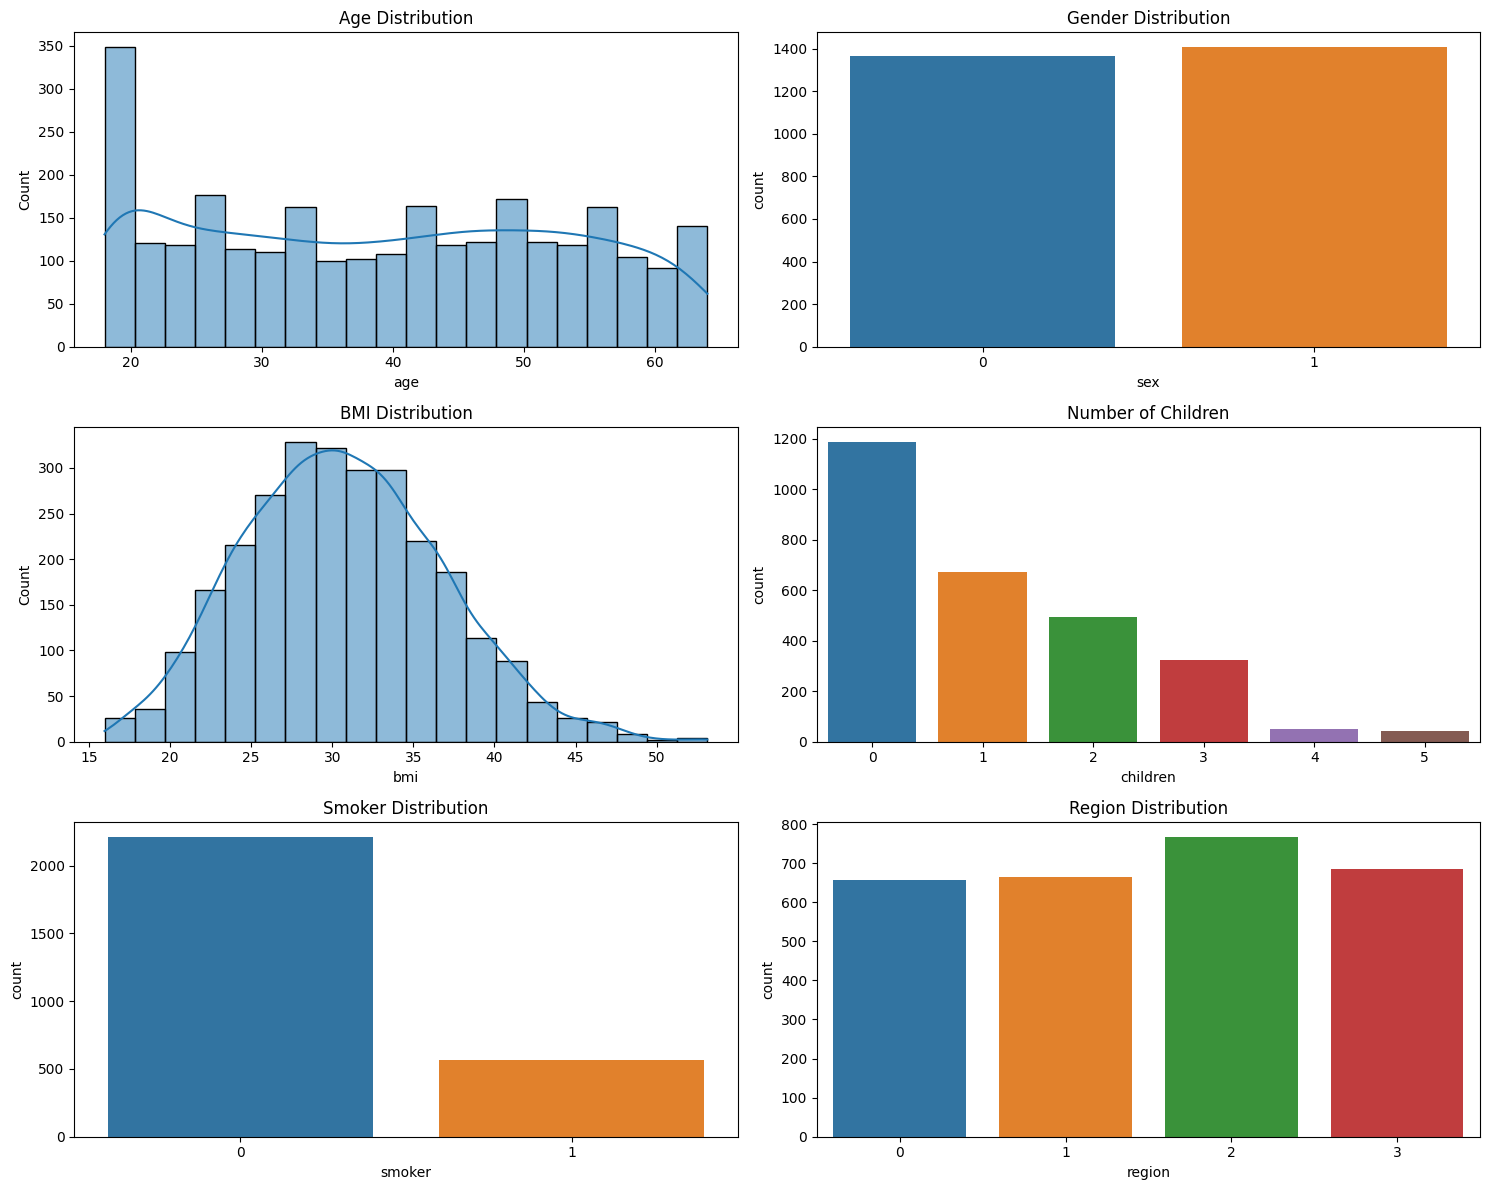

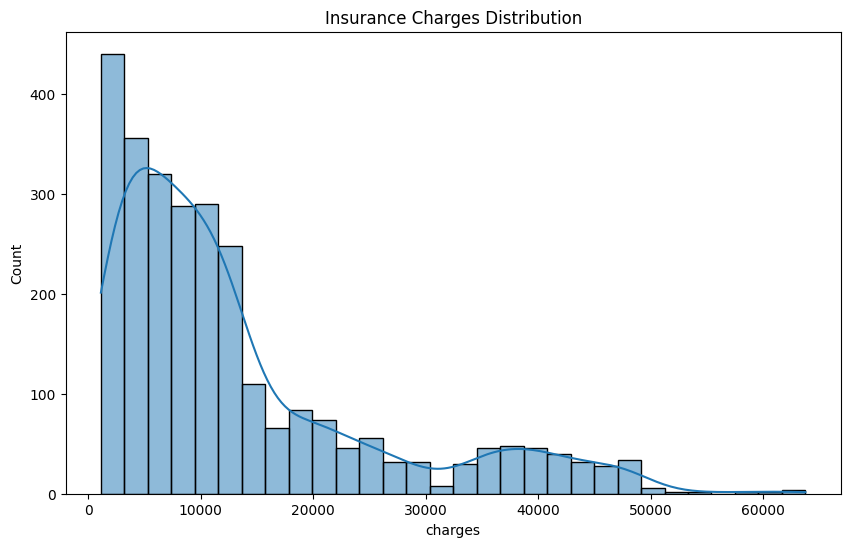

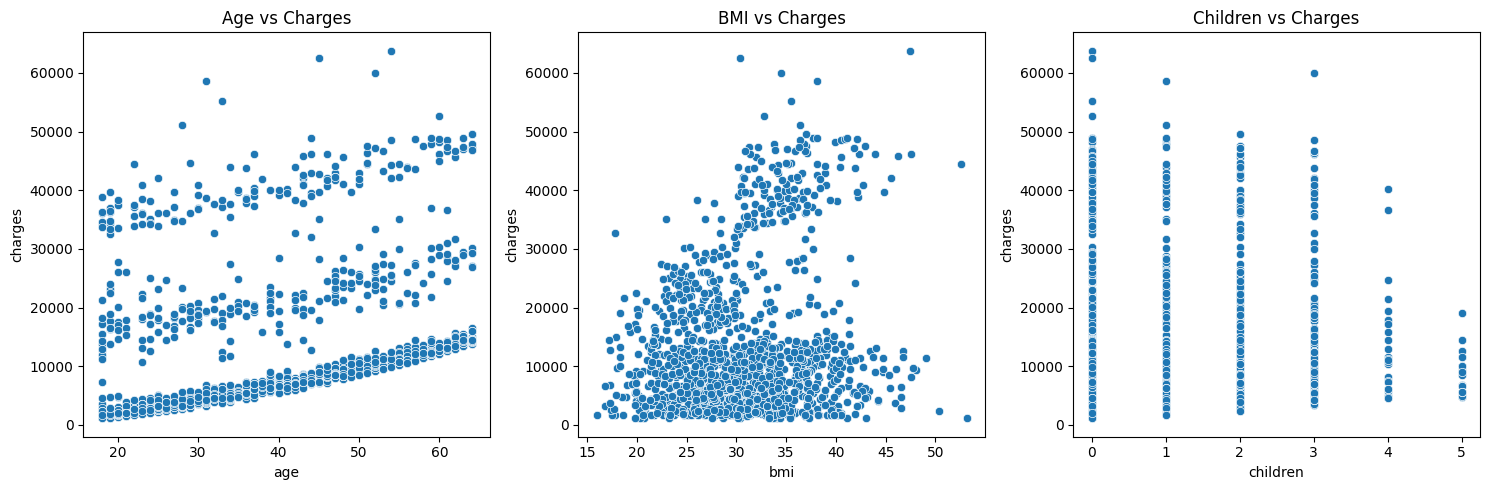

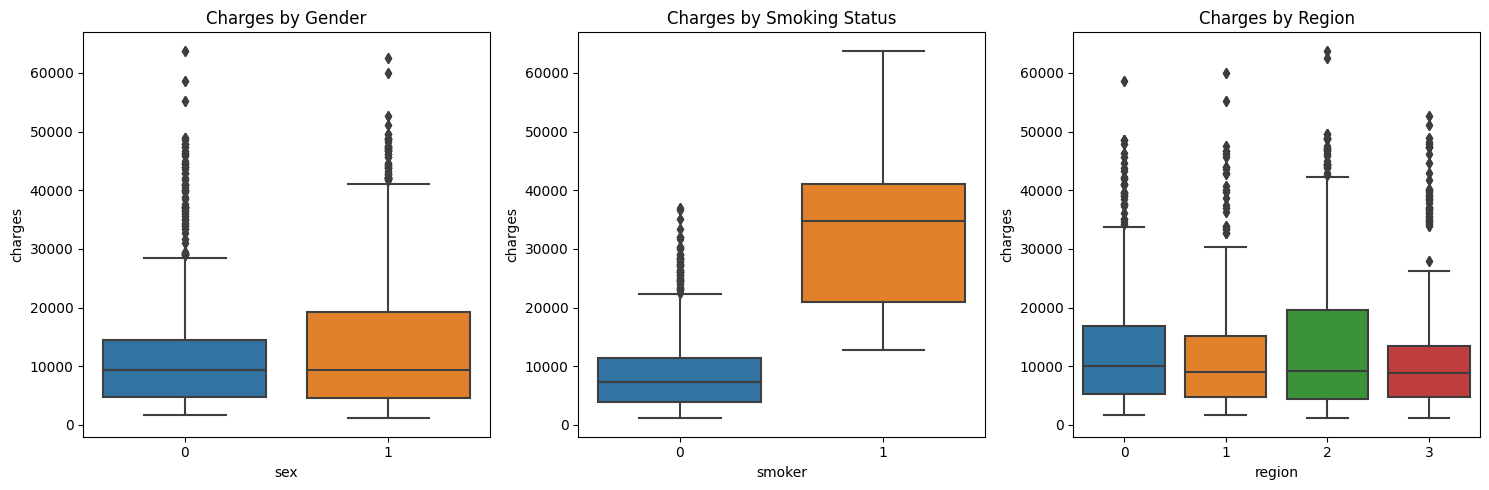

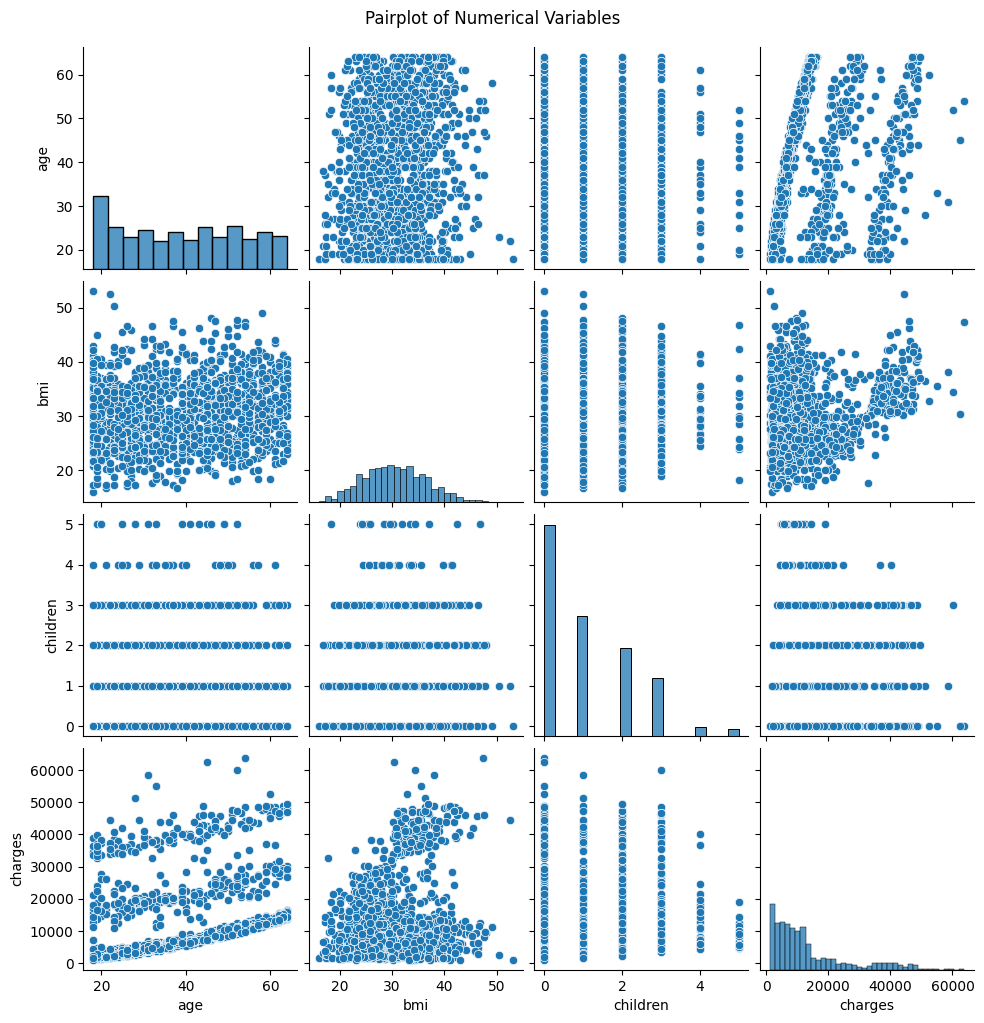

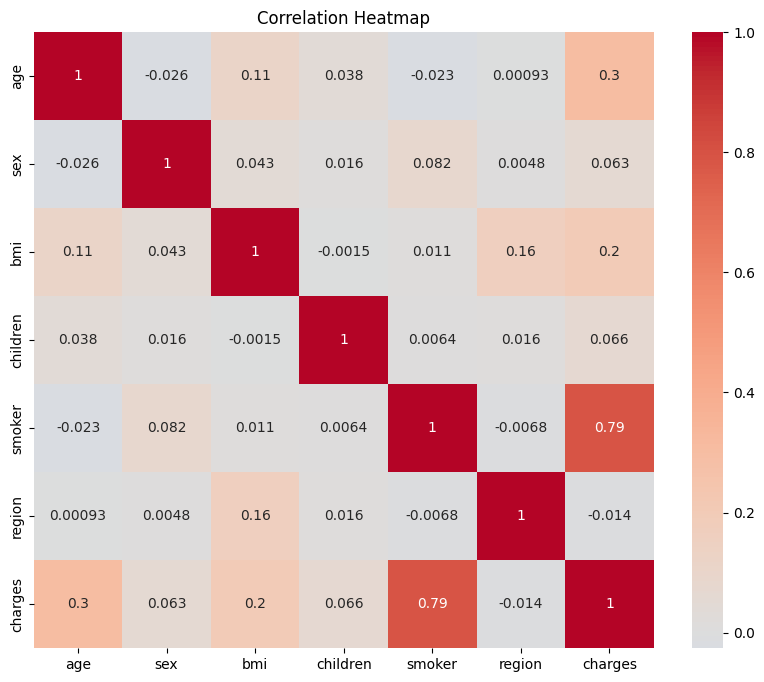

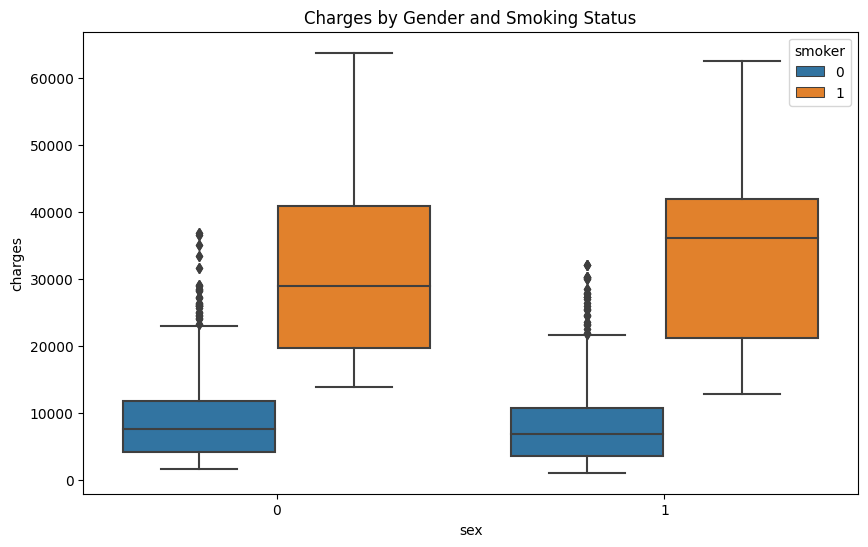

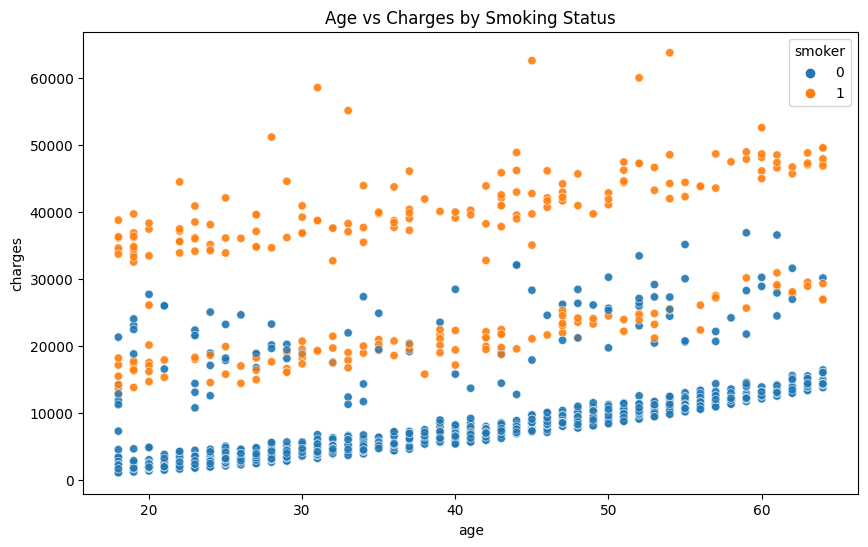

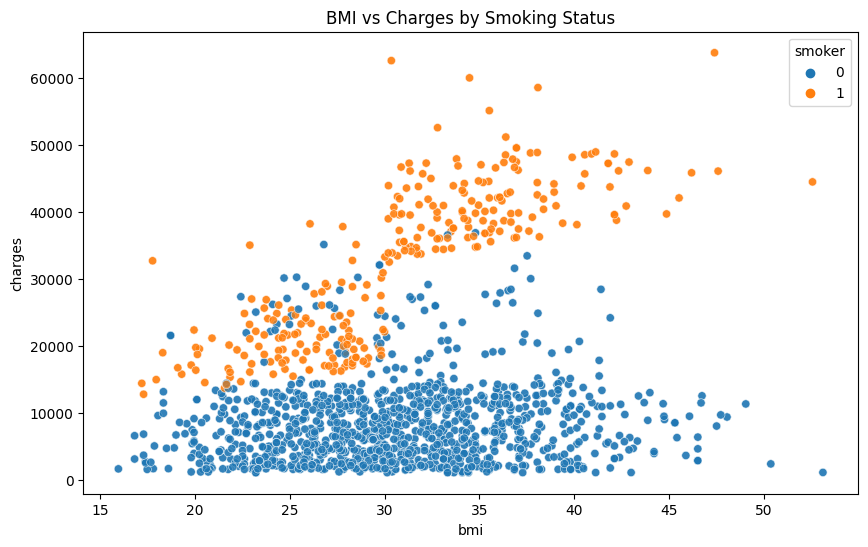

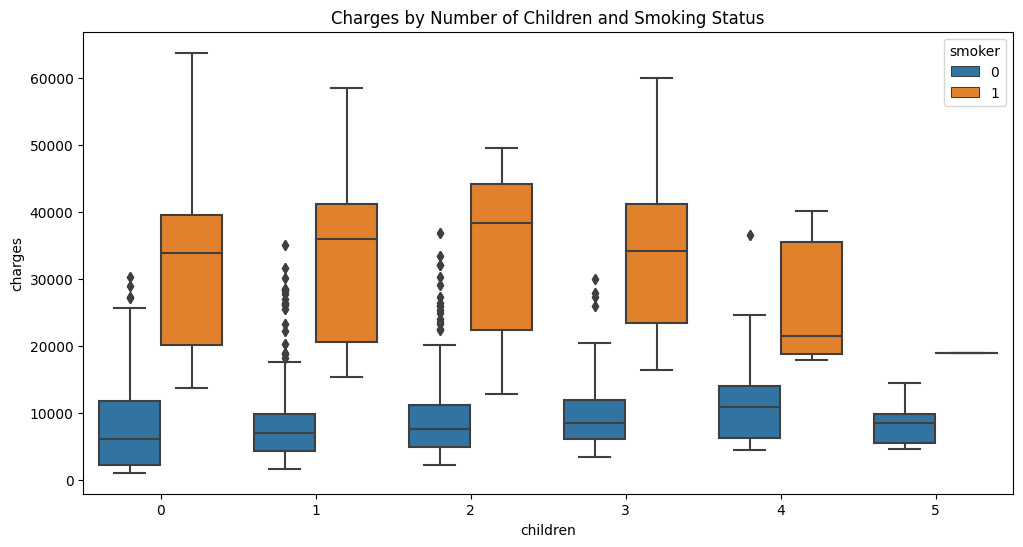

In [57]:
plt.figure(figsize=(15, 12))

# Age distribution
plt.subplot(3, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

# Sex distribution
plt.subplot(3, 2, 2)
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')

# BMI distribution
plt.subplot(3, 2, 3)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

# Children count
plt.subplot(3, 2, 4)
sns.countplot(x='children', data=df)
plt.title('Number of Children')

# Smoker distribution
plt.subplot(3, 2, 5)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')

# Region distribution
plt.subplot(3, 2, 6)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

plt.tight_layout()
plt.show()

# Charges distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Insurance Charges Distribution')
plt.show()

## 3. Bivariate Analysis
# Numerical vs Numerical
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()

# Categorical vs Numerical
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis
# Pairplot for numerical variables
numerical_cols = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Interaction between smoking, gender and charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', hue='smoker', data=df)
plt.title('Charges by Gender and Smoking Status')
plt.show()

## 5. Advanced Visualizations
# Age vs Charges with smoking status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('Age vs Charges by Smoking Status')
plt.show()

# BMI vs Charges with smoking status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('BMI vs Charges by Smoking Status')
plt.show()

# Distribution of charges by number of children and smoking status
plt.figure(figsize=(12, 6))
sns.boxplot(x='children', y='charges', hue='smoker', data=df)
plt.title('Charges by Number of Children and Smoking Status')
plt.show()

- The target variable (charges) is right skewed. We will correct for the outlier.

In [58]:
df[(df['charges'] > 40000)]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
39,60,1,39.900,0,1,3,48173.36100
55,58,1,36.955,2,1,1,47496.49445
86,57,0,31.160,0,1,1,43578.93940
94,64,0,31.300,2,1,3,47291.05500
...,...,...,...,...,...,...,...
2687,62,1,30.875,3,1,1,46718.16325
2709,42,0,40.370,2,1,2,43896.37630
2735,52,1,41.800,2,1,2,47269.85400
2736,64,1,36.960,2,1,2,49577.66240


In [71]:
# Calculate median charges per age group
median_per_age = df.groupby('age')['charges'].median()

# Replace outliers (> 40000) with the median of their age group, or global median if missing
global_median = df['charges'].median()
df.loc[df['charges'] > 40000, 'charges'] = df['age'].map(median_per_age).fillna(global_median)

# Verify changes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [77]:
# Drop rows where charges > 40000 (axis=0 is for rows, axis=1 is for columns)
df = df.drop(df[df['charges'] > 40000].index, axis=0)

# Alternative (more readable) way:
df = df[df['charges'] <= 40000]

# Reset index (optional, if you want a clean sequential index)
df = df.reset_index(drop=True)

# Verify changes
print(df.head())
print(f"New shape: {df.shape}")

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
New shape: (2608, 7)


In [78]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

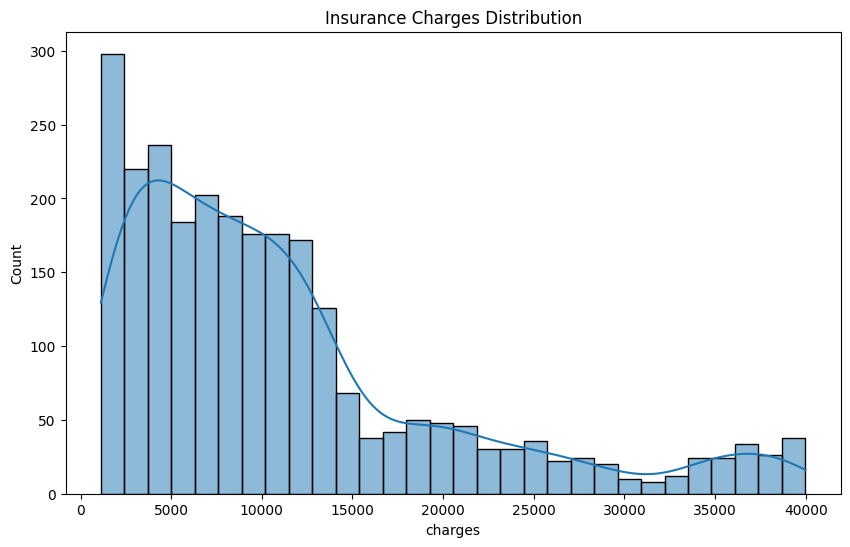

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Insurance Charges Distribution')
plt.show()

## Model Building

In [80]:
X = df.drop('charges',axis =1)
y = df['charges']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42)

In [87]:
# Multiple Model Building 
from sklearn.linear_model import(
LinearRegression,
RidgeCV,
LassoCV,
ElasticNetCV
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
RandomForestRegressor,
BaggingRegressor,
GradientBoostingRegressor,
AdaBoostRegressor,
ExtraTreesRegressor,
)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [88]:
models = {
    'Linear Regressor': LinearRegression(),
    'RidgeCV': RidgeCV(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(verbosity=0)  # Fixed typo: 'versbosity' -> 'verbosity'
}

cross_val_scores = {}
valid_scores = {}  # Fixed variable name: 'valid_scores' instead of 'valid_score'

for name, model in models.items():
    print(f"\nModel: {name}")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cross_val_scores[name] = scores.mean()  # Fixed: Store mean score with model name as key
    print(f'CV RMSE Scores: {scores}')
    print(f"Mean CV RMSE: {scores.mean():.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    valid_scores[name] = rmse  # Fixed: Store RMSE with model name as key
    print(f"Validation RMSE: {rmse:.4f}")


Model: Linear Regressor
CV RMSE Scores: [-5470.46408005 -5816.09998169 -5265.72413264 -5785.8330942
 -5055.33233498]
Mean CV RMSE: -5478.6907
Validation RMSE: 5520.6940

Model: RidgeCV
CV RMSE Scores: [-5470.37747335 -5816.36472163 -5266.20607666 -5785.44115133
 -5055.03262734]
Mean CV RMSE: -5478.6844
Validation RMSE: 5520.8651

Model: LassoCV
CV RMSE Scores: [-5464.84214576 -5822.34101    -5277.22061442 -5780.08016145
 -5045.61911623]
Mean CV RMSE: -5478.0206
Validation RMSE: 5526.0611

Model: ElasticNetCV
CV RMSE Scores: [-8781.12389422 -9334.18003269 -9075.49946752 -8783.62807966
 -8293.19428788]
Mean CV RMSE: -8853.5252
Validation RMSE: 9115.9975

Model: DecisionTree
CV RMSE Scores: [-3985.14602348 -3944.68426731 -3730.38419461 -4936.86786839
 -3946.17500295]
Mean CV RMSE: -4108.6515
Validation RMSE: 2486.2919

Model: RandomForest
CV RMSE Scores: [-3236.4679535  -3563.65199459 -3213.98278924 -3620.15547868
 -3396.70329914]
Mean CV RMSE: -3406.1923
Validation RMSE: 2356.5176

Mode

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

def compare_models(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define models and their parameter grids
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'model__alpha': [0.1, 1, 10, 100]
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'model__alpha': [0.1, 1, 10],
                'model__max_iter': [1000, 5000]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'model__n_estimators': [50, 100],
                'model__max_depth': [None, 5, 10],
                'model__min_samples_split': [2, 5]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'model__n_estimators': [50, 100],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'model__n_estimators': [50, 100],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 6]
            }
        }
    }

    results = []
    best_model = None
    best_score = -np.inf
    
    for model_name, model_info in models.items():
        print(f"\nTraining {model_name}...")
        
        # Create pipeline with scaling
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model_info['model'])
        ])
        
        # GridSearchCV
        grid = GridSearchCV(
            pipe,
            model_info['params'],
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=0
        )
        
        grid.fit(X_train, y_train)
        
        # Evaluate
        y_pred = grid.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Best CV Score (-RMSE)': grid.best_score_,
            'Test RMSE': rmse,
            'Test R2': r2,
            'Best Parameters': grid.best_params_
        })
        
        # Track best model
        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = {
                'name': model_name,
                'estimator': grid.best_estimator_,
                'params': grid.best_params_,
                'cv_score': grid.best_score_,
                'test_rmse': rmse,
                'test_r2': r2
            }
    
    # Display results
    results_df = pd.DataFrame(results).sort_values('Best CV Score (-RMSE)', ascending=False)
    print("\n" + "="*60)
    print("MODEL COMPARISON RESULTS:")
    print("="*60)
    print(results_df.to_string(index=False))
    
    # Display best model
    print("\n" + "="*60)
    print("BEST MODEL:")
    print("="*60)
    print(f"Model Name: {best_model['name']}")
    print(f"Cross-Validation Score (-RMSE): {best_model['cv_score']:.4f}")
    print(f"Test RMSE: {best_model['test_rmse']:.4f}")
    print(f"Test R²: {best_model['test_r2']:.4f}")
    print("\nBest Parameters:")
    for param, value in best_model['params'].items():
        print(f"{param}: {value}")
    
    return best_model['estimator']

# Example usage:
best_model = compare_models(X, y)


Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

MODEL COMPARISON RESULTS:
            Model  Best CV Score (-RMSE)   Test RMSE  Test R2                                                                       Best Parameters
    Random Forest           -3062.090514 2322.500125 0.936165 {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
          XGBoost           -3397.051679 3016.898508 0.892286      {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100}
Gradient Boosting           -3577.865921 3126.326748 0.884331      {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
 Lasso Regression           -5516.064840 5353.937474 0.660768                                         {'model__alpha': 10, 'model__max_iter': 1000}
 Ridge Regression           -5516.339626 5354.122033 0.660745  